In [1]:
# Standard libraries
import math
import torch
import gpytorch
import numpy as np
from matplotlib import pyplot as plt

# Import custom modules
from function import FunctionUtils
from nd_model import ExactGPModel
from data import generate_nd_data
from normalize_data import normalize_data
from training import GPTrainer
from optimizer import OptimizerHandler
from visualizer import Visualizer
from main import MainRunner

In [7]:
# --- Experiment Configuration ---
experiment_config = {
    "dims_to_run": [1, 2, 3, 4, 5],  # Dimensions to test
    
    # Global (default) settings - can be overridden per dimension
    "function_name": "rosenbrock",    # Default function if not specified per dimension
    "n_samples": 100,                 # Default number of samples
    "optimizer_name": "LBFGS",        # Default optimizer
    "lr": 0.01,                       # Default learning rate
    "train_iter": 150,                # Default training iterations
    "noise_level": 1e-4,              # Default noise level
    "domain_range": (-2, 2),          # Default input domain
    "random_state_data": 42,          # Default random seed for data generation

    # Special n_samples handling (optional global overrides that can be further dimension-specific)
    "n_samples_1d_viz": 6,           # Samples for 1D visualization (if different from general n_samples for 1D)
                                      # Note: dim_specific_configs for "1" will override this if "n_samples" is set there.
    "n_samples_high_dim_factor": 30,  # Base factor for n_samples in higher dims (e.g., 30 * d)

    # Dimension-specific overrides (optional)
    # Keys should be strings representing the dimension
    "dim_specific_configs": {
        "1": {
            "function_name": "sphere", 
            "n_samples": 6, # Overrides n_samples_1d_viz and global n_samples for 1D
            "optimizer_name": "LBFGS",
            "lr": 0.05,
            "train_iter": 100,
            "domain_range": (-2,2)
        },
        "2": {
            "function_name": "ackley", 
            "n_samples": 150,
            "optimizer_name": "LBFGS",
            "lr": 0.01,
            "train_iter": 200,
            "domain_range": (-4,4) 
        },
        "3": {
            "function_name": "rastrigin",
            "n_samples": 200, # Can also use n_samples_high_dim_factor logic in MainRunner
            "optimizer_name": "ADAM",
            "lr": 0.01,
            "train_iter": 250,
            "domain_range": (-5.12, 5.12) # Common domain for Rastrigin
        },
        "4": {
            "function_name": "rosenbrock", # Using the global default function here
            "n_samples": 250,
            "optimizer_name": "LBFGS",
            "lr": 0.005, # Potentially smaller LR for higher dimensions
            "train_iter": 300,
            "domain_range": (-2.5, 2.5) 
        },
        "5": {
            "function_name": "sphere",
            "n_samples": 300,
            "optimizer_name": "ADAM",
            "lr": 0.005,
            "train_iter": 350,
            "domain_range": (-4, 4)
        }
    }
}


--- Training 1D model using sphere with LBFGS (LR: 0.05, Iter: 100, Samples: 6) ---
Starting training with LBFGS optimizer, LR: 0.05, Iterations: 100
Iter 10/100 - Loss: 0.24437230825424194
Iter 20/100 - Loss: 0.24437230825424194
Iter 30/100 - Loss: 0.24437230825424194
Iter 40/100 - Loss: 0.24437230825424194
Iter 50/100 - Loss: 0.24437230825424194
Iter 60/100 - Loss: 0.24437230825424194
Iter 70/100 - Loss: 0.24437230825424194
Iter 80/100 - Loss: 0.24437230825424194
Iter 90/100 - Loss: 0.24437230825424194
Iter 100/100 - Loss: 0.24437230825424194
1D Metrics for sphere:
  MSE  = 0.1319
  NMSE = 1.5139
  MNLP = -2.1666


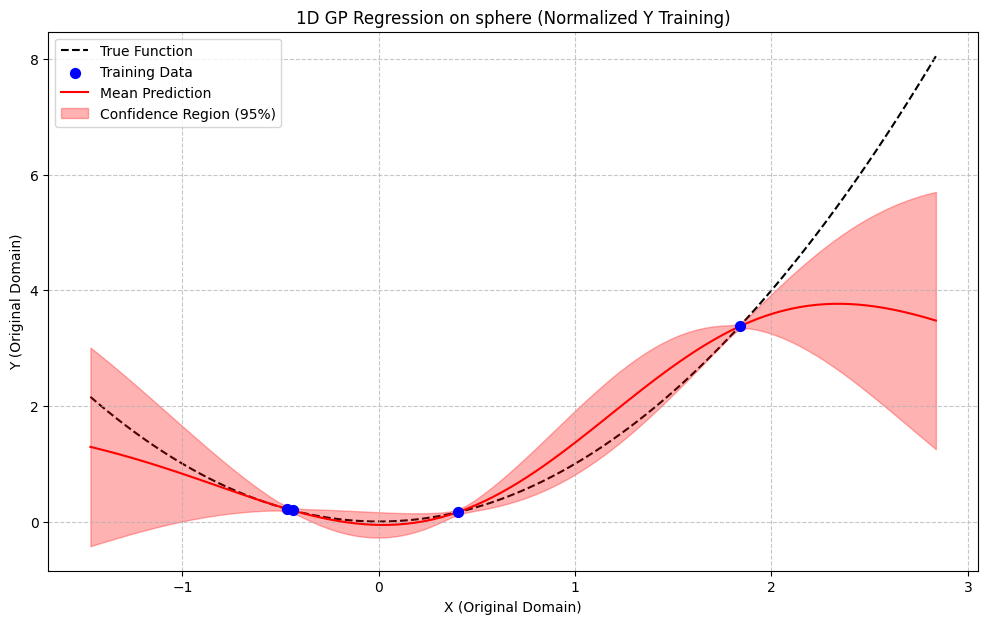


--- Training 2D model using ackley with LBFGS (LR: 0.01, Iter: 200, Samples: 150) ---
Starting training with LBFGS optimizer, LR: 0.01, Iterations: 200
Iter 10/200 - Loss: 0.29044368863105774
Iter 20/200 - Loss: 0.29044368863105774
Iter 30/200 - Loss: 0.29044368863105774
Iter 40/200 - Loss: 0.29044368863105774
Iter 50/200 - Loss: 0.29044368863105774
Iter 60/200 - Loss: 0.29044368863105774
Iter 70/200 - Loss: 0.29044368863105774
Iter 80/200 - Loss: 0.29044368863105774
Iter 90/200 - Loss: 0.29044368863105774
Iter 100/200 - Loss: 0.29044368863105774
Iter 110/200 - Loss: 0.29044368863105774
Iter 120/200 - Loss: 0.29044368863105774
Iter 130/200 - Loss: 0.29044368863105774
Iter 140/200 - Loss: 0.29044368863105774
Iter 150/200 - Loss: 0.29044368863105774
Iter 160/200 - Loss: 0.29044368863105774
Iter 170/200 - Loss: 0.29044368863105774
Iter 180/200 - Loss: 0.29044368863105774
Iter 190/200 - Loss: 0.29044368863105774
Iter 200/200 - Loss: 0.29044368863105774
2D Metrics for ackley:
  MSE  = 0.45

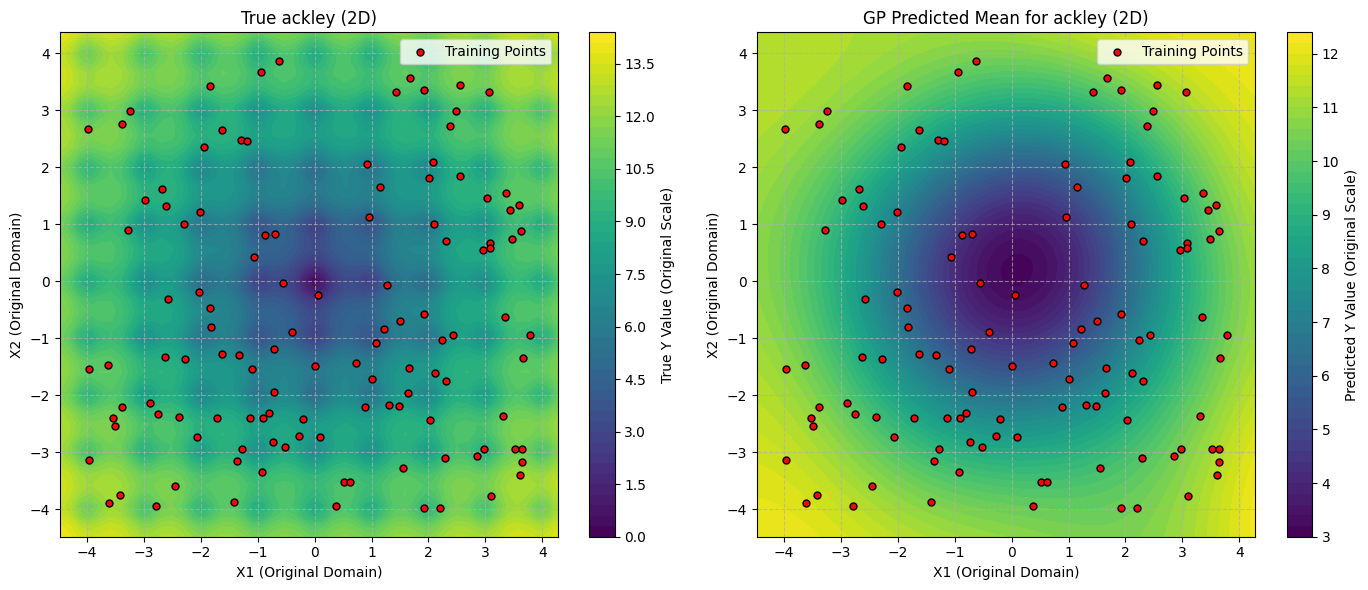


--- Training 3D model using rastrigin with ADAM (LR: 0.01, Iter: 250, Samples: 200) ---
Starting training with ADAM optimizer, LR: 0.01, Iterations: 250
Iter 10/250 - Loss: 1.2687616348266602
Iter 20/250 - Loss: 1.2434885501861572
Iter 30/250 - Loss: 1.2240841388702393
Iter 40/250 - Loss: 1.2107350826263428
Iter 50/250 - Loss: 1.2021331787109375
Iter 60/250 - Loss: 1.196589708328247
Iter 70/250 - Loss: 1.1928764581680298
Iter 80/250 - Loss: 1.1902990341186523
Iter 90/250 - Loss: 1.188446283340454
Iter 100/250 - Loss: 1.187056064605713
Iter 110/250 - Loss: 1.1859703063964844
Iter 120/250 - Loss: 1.1850976943969727
Iter 130/250 - Loss: 1.1843817234039307
Iter 140/250 - Loss: 1.1837867498397827
Iter 150/250 - Loss: 1.183288812637329
Iter 160/250 - Loss: 1.1828699111938477
Iter 170/250 - Loss: 1.1825164556503296
Iter 180/250 - Loss: 1.1822173595428467
Iter 190/250 - Loss: 1.1819632053375244
Iter 200/250 - Loss: 1.181746244430542
Iter 210/250 - Loss: 1.1815595626831055
Iter 220/250 - Loss:

In [8]:
# Main entry point example
if __name__ == "__main__": # This check is good practice but in notebooks, cells run sequentially
    # Create instances of required classes
    data_gen_func = generate_nd_data  # Function reference
    
    # Pass the likelihood CLASS and optimizer handler CLASS
    # Trainer and OptimizerHandler classes are passed, not instances yet
    trainer_cls = GPTrainer 
    optimizer_handler_cls = OptimizerHandler
    
    visualizer_instance = Visualizer()
    
    # Instantiate MainRunner with the configuration
    runner = MainRunner(
        data_generator=data_gen_func,
        normalizer=normalize_data,
        trainer_class=trainer_cls,
        optimizer_handler_class=optimizer_handler_cls,
        visualizer=visualizer_instance,
        config=experiment_config # Pass the config dictionary
    )
    
    # Run experiments based on the configuration
    results = runner.run_from_config()
    # results = runner.run_single_experiment()
    
    # Summary is printed within run_from_config, but you can add more here
    print("\n=== Experiment Run Complete ===")
